In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Connect With File Excel
file_path = 'Report_New.xlsx' 
df = pd.read_excel(file_path)
print(df.head())

   date_start   date_stop                         campaign_name  \
0  2024-03-25  2024-03-25                Messenger - Post image   
1  2024-03-25  2024-03-25                Messenger - Post image   
2  2024-03-25  2024-03-25  Messenger - Post image - Căn Imperia   
3  2024-03-25  2024-03-25  Messenger - Post image - Căn Imperia   
4  2024-03-25  2024-03-25     Dream Football - video - messages   

                                        adset_name  \
0                 Ad set 1 - Vietnamese - carousel   
1                 Ad set 1 - Vietnamese - carousel   
2                 Ad set 1 - Vietnamese - carousel   
3   Ad set 2 - Existing post on page imperia 2n1vs   
4  New Engagement Ad set with recommended settings   

                                       ad_name               ad_id  reach  \
0                               Ad multi image  120207882091370363   1888   
1                               Ad multi image  120207882091370363   1593   
2                               Ad multi 

In [3]:
df . info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 15 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   date_start                                           1087 non-null   object 
 1   date_stop                                            1087 non-null   object 
 2   campaign_name                                        1087 non-null   object 
 3   adset_name                                           1087 non-null   object 
 4   ad_name                                              1087 non-null   object 
 5   ad_id                                                1087 non-null   int64  
 6   reach                                                1087 non-null   int64  
 7   impressions                                          1087 non-null   int64  
 8   frequency                                            1087 non-null  

In [4]:
# Loại Bỏ NaN
df.dropna(subset=['reach', 'impressions', 'frequency', 'clicks', 'spend', 
                  'onsite_conversion.messaging_conversation_started_7d', 'onsite_conversion.messaging_first_reply'], 
         inplace=True)


In [5]:
#Chuyển đổi dữ liệu
df['date_start'] = pd.to_datetime(df['date_start']) 
df['date_stop'] = pd.to_datetime(df['date_stop'])
df['campaign_name'] = df['campaign_name'].astype('category')
df['ad_name'] = df['ad_name'].astype('category')
df['ad_id'] = df['ad_id'].astype(int)
df['reach'] = df ['reach']. astype(int)
df['impressions'] = df['impressions'].astype(int)
df['clicks'] = df['clicks'].astype (int)
df['onsite_conversion.messaging_conversation_started_7d'] = df ['onsite_conversion.messaging_conversation_started_7d'].astype(int)
df['onsite_conversion.messaging_first_reply'] = df ['onsite_conversion.messaging_first_reply'].astype(int)


In [6]:
#Check lại lần nữa
df . info()

<class 'pandas.core.frame.DataFrame'>
Index: 1049 entries, 0 to 1086
Data columns (total 15 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   date_start                                           1049 non-null   datetime64[ns]
 1   date_stop                                            1049 non-null   datetime64[ns]
 2   campaign_name                                        1049 non-null   category      
 3   adset_name                                           1049 non-null   object        
 4   ad_name                                              1049 non-null   category      
 5   ad_id                                                1049 non-null   int32         
 6   reach                                                1049 non-null   int32         
 7   impressions                                          1049 non-null   int32         
 8   fre

In [7]:
#Tính sum để sử dụng các hàm tính toán
df['AVG_CTR'] = (df['clicks'].sum() / df['impressions'].sum()) * 100 # This code will create 1 new colum for total data
df['AVG_CP_New_Mess'] = df['spend'].sum() / df ['onsite_conversion.messaging_conversation_started_7d'].sum()
df['AVG_CP_Rep_Mess'] = df['spend'].sum() / df ['onsite_conversion.messaging_first_reply'].sum()
df['AVG_CPM'] = df['spend'].sum() / df['impressions'].sum()
df['AVG_CPC'] = df['spend'].sum() / df['clicks'].sum()
df['New_Mess_Rate'] = (df['onsite_conversion.messaging_conversation_started_7d'].sum() / df['clicks'].sum())*100
df['Rep_Mess_Rate'] = (df['onsite_conversion.messaging_first_reply'].sum() / df['clicks'] . sum()) *100

In [8]:
# Hiển thị các chỉ số ra ngoài
print(f"Trung Bình Tỉ Lệ Nhấp Chuột: {df['AVG_CTR'][0]:.2f}%")
print(f"Trung Bình Giá Tiền New Mess: {df['AVG_CP_New_Mess'][0]:,.0f}")
print(f"Trung Bình Giá Tiền Rep Mess: {df['AVG_CP_Rep_Mess'][0]:,.0f}")
print(f"Trung Bình Giá Tiền CPM: {df['AVG_CPM'][0]:,.0f}")
print(f"Trung Bình Giá Tiền CPC: {df['AVG_CPC'][0]:,.0f}")
print(f"Trung Bình Tỉ Lệ Ra New Mess: {df['New_Mess_Rate'][0]:,.1f}%")
print(f"Trung Bình Tỉ Lệ Ra Rep Mess: {df['Rep_Mess_Rate'][0]:,.1f}%")

Trung Bình Tỉ Lệ Nhấp Chuột: 3.15%
Trung Bình Giá Tiền New Mess: 62,364
Trung Bình Giá Tiền Rep Mess: 63,673
Trung Bình Giá Tiền CPM: 83
Trung Bình Giá Tiền CPC: 2,635
Trung Bình Tỉ Lệ Ra New Mess: 4.2%
Trung Bình Tỉ Lệ Ra Rep Mess: 4.1%


In [9]:
#Tính tương quan các chỉ số
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('ad_id')  # Loại bỏ 'ad_id' khỏi danh sách
num_metrics = df[numeric_cols]
metrics_corr = num_metrics.corr()
metrics_corr = metrics_corr.dropna(axis=0, how='all').dropna(axis=1, how='all')
print(metrics_corr.to_string())



                                                        reach  impressions  frequency    clicks       ctr     spend  onsite_conversion.messaging_conversation_started_7d  onsite_conversion.messaging_first_reply
reach                                                1.000000     0.993360   0.065267  0.667878 -0.112889  0.634437                                             0.266700                                 0.261659
impressions                                          0.993360     1.000000   0.119164  0.668475 -0.114612  0.655911                                             0.298570                                 0.293933
frequency                                            0.065267     0.119164   1.000000  0.072097  0.137015  0.206783                                             0.168569                                 0.167446
clicks                                               0.667878     0.668475   0.072097  1.000000  0.312949  0.396871                                             

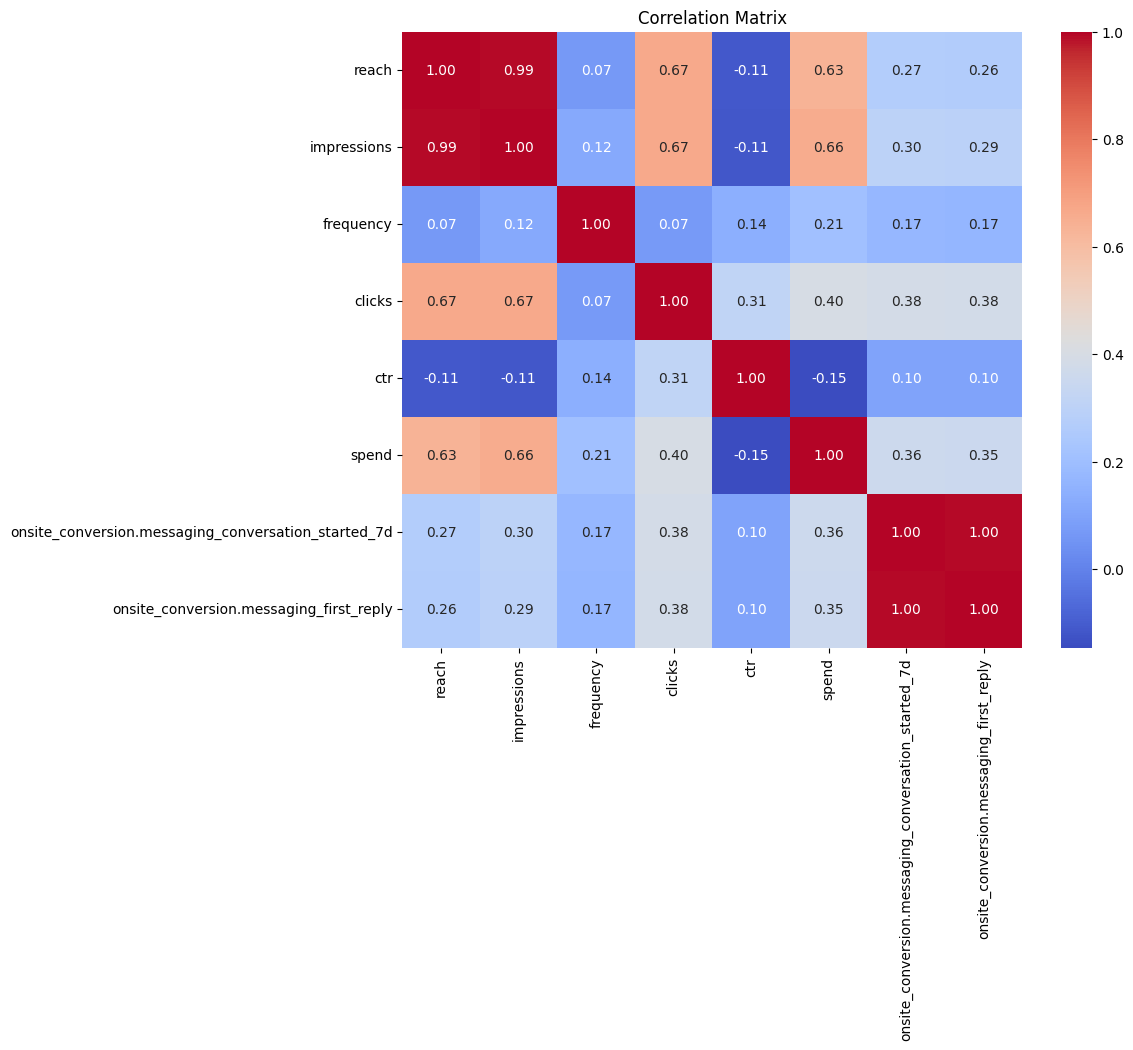

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(metrics_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [11]:
# Chạy thử spearman
spearman_corr = num_metrics.corr(method='spearman')
spearman_corr = spearman_corr.dropna(axis=0, how='all').dropna(axis=1, how='all')
spearman_corr = spearman_corr.drop('ad_id', axis=0).drop('ad_id', axis=1)
print("\nSpearman Correlation:\n", spearman_corr.to_string())



KeyError: "['ad_id'] not found in axis"

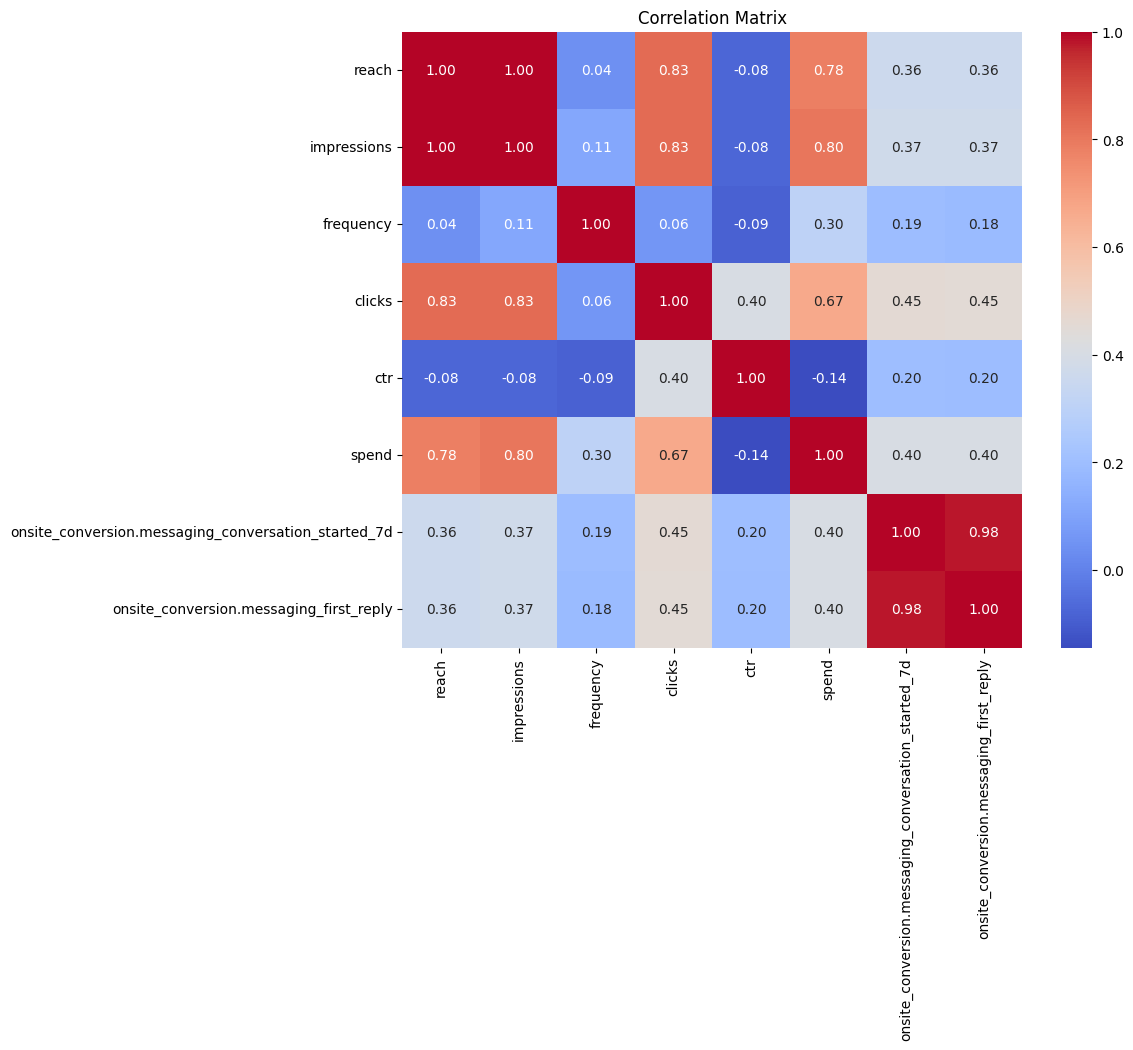

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

##Tương quan spearman phù hợp hơn với các dữ liệu marketing

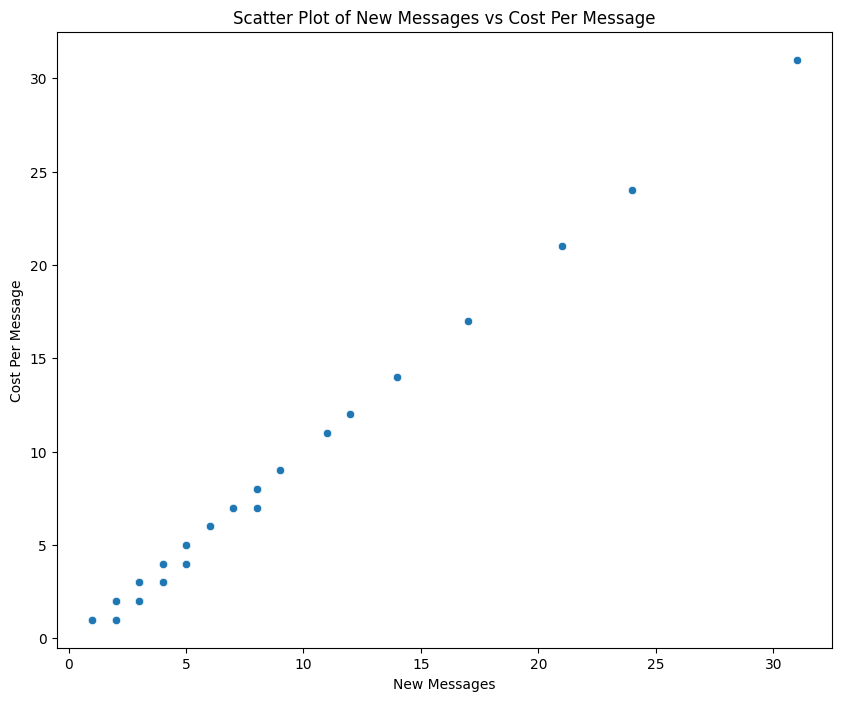

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='onsite_conversion.messaging_conversation_started_7d', y='onsite_conversion.messaging_first_reply')
plt.xlabel('New Messages')
plt.ylabel('Cost Per Message')
plt.title('Scatter Plot of New Messages vs Cost Per Message')
plt.show()

In [ ]:
cols_to_convert = ['impressions','spend', 'clicks', 'AVG_CTR', 'Rep_Mess_Rate', 'AVG_CPM', 'AVG_CPC', 'onsite_conversion.messaging_first_reply']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
# Loại bỏ các hàng chứa giá trị NaN hoặc inf
df_actions = df.dropna(subset=cols_to_convert)
df_actions[cols_to_convert] = df_actions[cols_to_convert].replace([np.inf, -np.inf], np.nan)
df_actions = df_actions.dropna(subset=cols_to_convert)
# Chọn các cột cho x và y
x = df_actions[['impressions','spend', 'clicks', 'AVG_CTR', 'Rep_Mess_Rate', 'AVG_CPM', 'AVG_CPC']]
y = df_actions['onsite_conversion.messaging_first_reply']
# Thêm hằng số vào x để mô hình hồi quy có intercept
x = sm.add_constant(x)
# Xây dựng mô hình hồi quy OLS
model = sm.OLS(y, x).fit()
# In ra tóm tắt của mô hình
print(model.summary())

                                       OLS Regression Results                                      
Dep. Variable:     onsite_conversion.messaging_first_reply   R-squared:                       0.199
Model:                                                 OLS   Adj. R-squared:                  0.197
Method:                                      Least Squares   F-statistic:                     86.68
Date:                                     Tue, 13 Aug 2024   Prob (F-statistic):           4.32e-50
Time:                                             05:46:17   Log-Likelihood:                -2051.3
No. Observations:                                     1049   AIC:                             4111.
Df Residuals:                                         1045   BIC:                             4130.
Df Model:                                                3                                         
Covariance Type:                                 nonrobust                                         


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Chuyển đổi các cột sang kiểu số và loại bỏ các hàng chứa giá trị NaN hoặc inf
cols_to_convert = ['impressions', 'spend', 'clicks', 'AVG_CTR', 'Rep_Mess_Rate', 'AVG_CPM', 'AVG_CPC', 'onsite_conversion.messaging_first_reply']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
df_actions = df.dropna(subset=cols_to_convert)
df_actions[cols_to_convert] = df_actions[cols_to_convert].replace([np.inf, -np.inf], np.nan)
df_actions = df_actions.dropna(subset=cols_to_convert)

# Chọn các cột cho x và y
x = df_actions[['impressions', 'spend', 'clicks', 'AVG_CTR', 'Rep_Mess_Rate', 'AVG_CPM', 'AVG_CPC']]
y = df_actions['onsite_conversion.messaging_first_reply']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [ ]:
# Tạo và huấn luyện mô hình Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=0)
gb_model.fit(x_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = gb_model.predict(x_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 3.857725535754447
R-squared: 0.2884895919082785


Mean Squared Error: 2.7401652380952384
R-squared: 0.49550456520922326
     Actual  Predicted
774       1       1.82
685       1       1.42
734       1       1.00
769       3       1.42
517       2       2.55
28        1       1.00
32        1       1.02
578       2       2.72
711       3       1.19
516       1       1.35


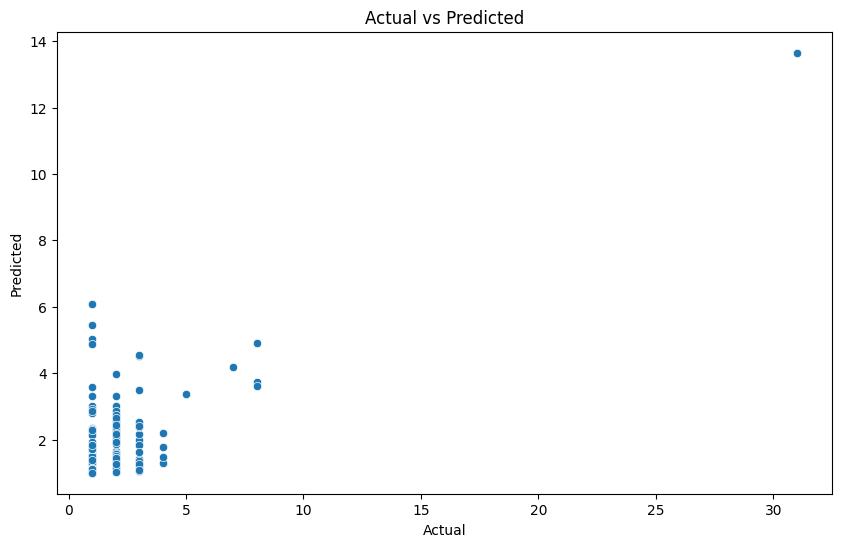

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Chọn các cột cho x và y
x = df[['spend', 'clicks', 'AVG_CTR', 'New_Mess_Rate', 'AVG_CPM', 'AVG_CPC']]
y = df['onsite_conversion.messaging_conversation_started_7d']
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# Tạo mô hình Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
# Huấn luyện mô hình
rf_model.fit(x_train, y_train)
# Dự đoán trên tập kiểm tra
y_pred = rf_model.predict(x_test)
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# In kết quả
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
# Hiển thị bảng so sánh giá trị thực và giá trị dự đoán
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head(10))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


Mean Squared Error: 2.7401652380952384
R-squared: 0.49550456520922326
Dự đoán số lượng tin nhắn mới trong 7 ngày tới:
[2.12 5.13 2.35 5.09 5.27 5.15 2.35]


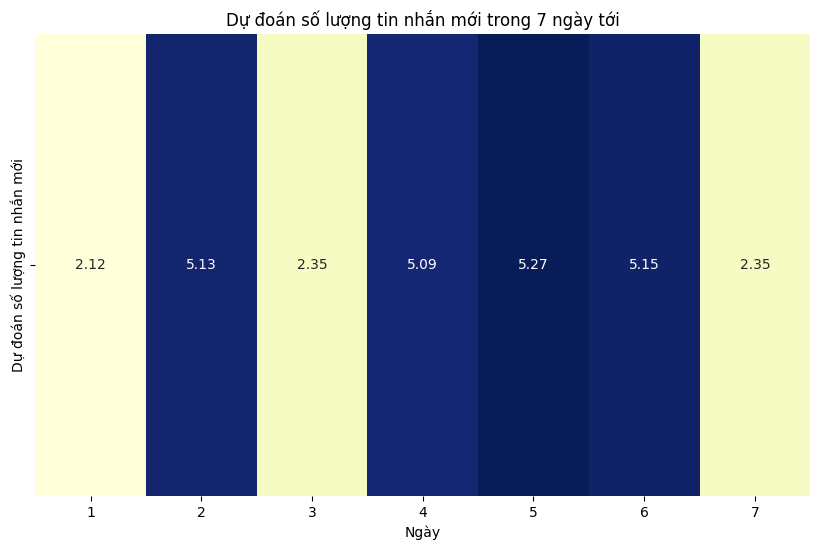

In [ ]:
x = df[['spend', 'clicks', 'AVG_CTR', 'New_Mess_Rate', 'AVG_CPM', 'AVG_CPC']]
y = df['onsite_conversion.messaging_conversation_started_7d']
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# Tạo mô hình Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
# Huấn luyện mô hình
rf_model.fit(x_train, y_train)
# Dự đoán trên tập kiểm tra
y_pred = rf_model.predict(x_test)
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
# Chuẩn bị dữ liệu dự đoán cho 7 ngày tới
num_samples = 7  # Dự đoán cho 7 ngày tới
future_data = {
    'spend': np.random.normal(1000000, 10000000, num_samples),  # Thay đổi giá trị này cho dữ liệu thực tế
    'clicks': np.random.normal(200, 50, num_samples),           # Thay đổi giá trị này cho dữ liệu thực tế
    'AVG_CTR': np.random.normal(0.05, 0.01, num_samples),       # Thay đổi giá trị này cho dữ liệu thực tế
    'New_Mess_Rate': np.random.normal(5, 1, num_samples),       # Thay đổi giá trị này cho dữ liệu thực tế
    'AVG_CPM': np.random.normal(10, 2, num_samples),            # Thay đổi giá trị này cho dữ liệu thực tế
    'AVG_CPC': np.random.normal(2, 0.5, num_samples)            # Thay đổi giá trị này cho dữ liệu thực tế
}
# Chuyển đổi dữ liệu dự đoán thành DataFrame
future_df = pd.DataFrame(future_data)
# Dự đoán số lượng tin nhắn mới trong 7 ngày tới
future_predictions = rf_model.predict(future_df)
print("Dự đoán số lượng tin nhắn mới trong 7 ngày tới:")
print(future_predictions)
# Tạo DataFrame để hiển thị kết quả dự đoán
future_results = pd.DataFrame({
    'Ngày': range(1, 8),
    'Dự đoán số lượng tin nhắn mới': future_predictions
})
# Vẽ bảng
plt.figure(figsize=(10, 6))
sns.heatmap(future_results.set_index('Ngày').T, annot=True, fmt=".2f", cmap="YlGnBu", cbar=False)
plt.title("Dự đoán số lượng tin nhắn mới trong 7 ngày tới")
plt.show()
